In [2]:
using PyPlot,JLD2,MCMCDiagnostics,CALCEPH
rc("font",family="serif")
include("CGS.jl")

Main.CGS

## Simulating Transit Times

In [3]:
include("sim_times.jl")
jd1 = 2.4332825e6
jd2 = 2.4478925e6
jdsize = 1000
sigma = 30.0
tt1,tt2,n_obs,pva_sun,pva_venus,pva_earth = sim_times(jd1,jd2,jdsize,true,sigma,true)

([2.4335037644169717e6, 2.4337284657591507e6, 2.4339531686526095e6, 2.4341778674053787e6, 2.4344025666358513e6, 2.434627271414518e6, 2.4348519724271446e6, 2.4350766718297163e6, 2.4353013698371616e6, 2.4355260698588854e6  …  2.4460870068001836e6, 2.4463117113811756e6, 2.446536412759622e6, 2.4467611126025775e6, 2.4469858106462015e6, 2.447210510572503e6, 2.44743521584485e6, 2.4476599158510813e6, 2.4478846141334274e6, 2.4481093143305457e6], [2.433624405366266e6, 2.433989659466875e6, 2.4343549165502605e6, 2.434720170357342e6, 2.4350854292193004e6, 2.4354506863932475e6, 2.435815938462895e6, 2.436181195268732e6, 2.436546452107642e6, 2.4369117086419472e6  …  2.444947349860095e6, 2.4453126079719667e6, 2.4456778645911547e6, 2.4460431244664053e6, 2.446408379255063e6, 2.446773637153357e6, 2.447138893738364e6, 2.4475041465111035e6, 2.447869404865882e6, 2.448234661849768e6], [0.22607071184005492, 0.8936832878479234, 0.3875851058405838], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0

In [6]:
eph = Ephem("INPUTS/planets.dat") ; prefetch(eph)
options = useNaifId + unitDay + unitAU

37

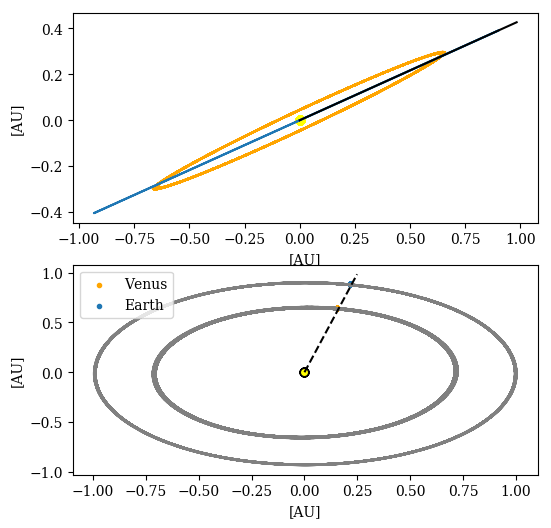

In [77]:
# pva0,pva1,and pva2 are the body positions,velocities,and ang. momentum computed at the transit times found
pva0 = zeros(9,length(tt2))
pva1 = zeros(9,length(tt2))
pva2 = zeros(9,length(tt2))
for i=1:length(tt2)
pva0[1:9,i] = compute(eph,tt1[i],0.5,10,10,options,2)
pva1[1:9,i] = compute(eph,tt1[i],0.5,2,10,options,2)
# if include_moon
#   pva_2[1:9,i] = compute(eph,t0[i],0.5,3,10,options,2) 
# else
pva2[1:9,i] = compute(eph,tt2[i],0.5,399,10,options,2)
end
        
fig=figure(figsize=(6,6))
subplot(211)
ax1=gca()
ax1.plot(vec(pva_sun[2,:]),vec(pva_sun[3,:]),label="Sun",color=:yellow,marker="o")
# ax1.plot(vec(pva_sun[2,:]),vec(pva_sun[3,:]),color=:yellow,marker="o",mec="black")
ax1.plot(vec(pva_venus[2,:]),vec(pva_venus[3,:]),label="Venus",color=:orange)
ax1.plot(vec(pva_earth[2,:]),vec(pva_earth[3,:]),label="Earth")
# ax1.plot([0,n_obs[2]*1.1],[0,n_obs[3]*1.1],color=:black)
# ax1.tick_params(which="major",direction="in",length=6,
#     left="false",right="false",top="false",bottom="false",
#     labelbottom="false",labeltop="false",labelleft="false",labelright="false")
xlabel("[AU]")
ylabel("[AU]")
# legend(loc="lower left")

subplot(212)
ax2=gca()
ax2.scatter(vec(pva0[2,:]),vec(pva0[3,:]),color=:yellow,marker="o",edgecolors="black")
# ax2.scatter(pva_venus[1,imin1],pva_venus[2,imin1],label="Venus Transit",color=:orange)
ax2.plot(vec(pva_venus[1,:]),vec(pva_venus[2,:]),color=:gray)
ax2.scatter(vec(pva1[1,:]),vec(pva1[2,:]),label="Venus",color=:orange,marker=".")
# ax2.scatter(pva_earth[1,imin2],pva_earth[2,imin2],label="Earth Transit")
ax2.plot(vec(pva_earth[1,:]),vec(pva_earth[2,:]),color=:gray)
ax2.scatter(vec(pva2[1,:]),vec(pva2[2,:]),label="Earth",marker=".")
ax2.plot([0,n_obs[1]*1.1],[0,n_obs[2]*1.1],"k--")
# ax2.tick_params(which="major",direction="in",
#     left="true",right="false",top="false",bottom="true",
#     labelbottom="true",labeltop="false",labelleft="true",labelright="false")
ax2.legend()
xlabel("[AU]")
ylabel("[AU]")
show()

### Plot of simulated years observed vs TTVs

In [109]:
include("decompose_ttvs.jl")
include("plot_likelihood.jl")
include("corner_plot.jl")
include("plot_ttvs.jl")

plot_ttvs (generic function with 2 methods)

In [40]:
fit = jldopen("OUTPUTS/p3_fittry003params.jld2","r")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/OUTPUTS/p3_fittry003params.jld2 (read-only)
 ├─🔢 param_p3
 ├─🔢 lprob_p3
 ├─🔢 lprob_best
 ├─🔢 pbest_global
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 jd1
 ├─🔢 jd2
 ├─🔢 jdsize
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 └─🔢 nphase

In [113]:
@load ("OUTPUTS/p3_fittry003params.jld2")

17-element Array{Symbol,1}:
 :param_p3    
 :lprob_p3    
 :lprob_best  
 :pbest_global
 :ntrans      
 :nplanet     
 :jd1         
 :jd2         
 :jdsize      
 :tt0         
 :tt          
 :ttmodel     
 :sigtt       
 :p3in        
 :p3out       
 :np3         
 :nphase      

In [ ]:
plot_ttvs(true)
# savefig("ttvs.png")

In [ ]:
# plot_ttvs(true)
# savefig("embttvs.png")

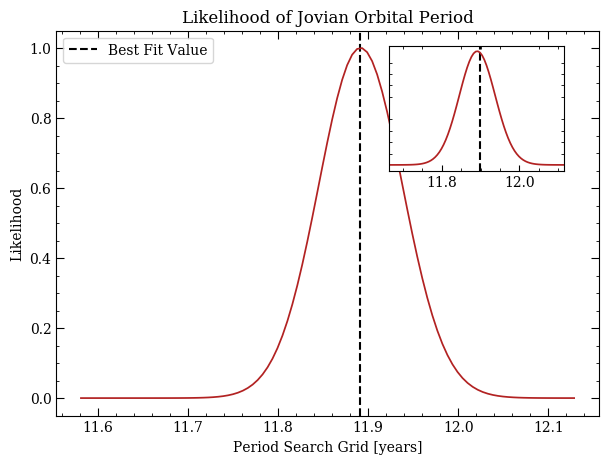

In [115]:
plot_likelihood(false)

In [116]:
# @load ("OUTPUTS/moon_fitmtry3params.jld2") 
plot_likelihood(true)

BoundsError: BoundsError: attempt to access 15-element Array{Float64,1} at index [18]

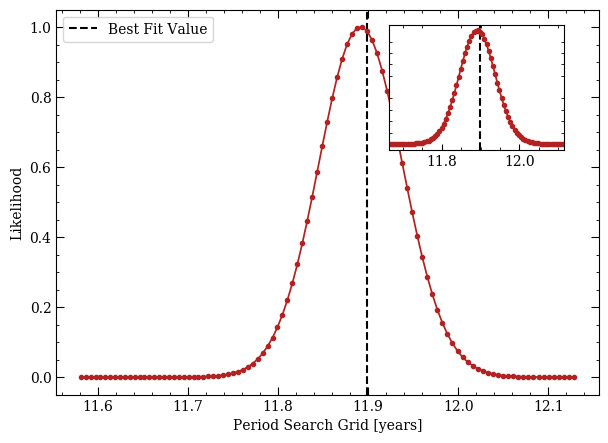

In [95]:
fig = plt.figure(figsize=(7, 5))
ax1 = gca()
p3 = 10 .^ range(log10(fit["p3in"]),stop=log10(fit["p3out"]),length=fit["np3"])
axvline(param[12]/365.25,linestyle="--",color="black",label="Best Fit Value")
ax1.plot(p3/365.25,exp.((fit["lprob_p3"] .-maximum(fit["lprob_p3"]))),linewidth=1.25,marker=".",color="firebrick")
ax1.minorticks_on()
ax1.tick_params(which="major",direction="in",top="true",right="true",length=6)
ax1.tick_params(which="minor",direction="in",top="true",right="true",length=2)
xlabel("Period Search Grid [years]")
ylabel("Likelihood")
legend(loc="upper left")
ax2 = fig.add_axes([0.6,0.6,0.25,0.25])
axvline(param[12]/365.25,linestyle="--",color="black")
ax2.plot(p3/365.25,exp.((fit["lprob_p3"] .-maximum(fit["lprob_p3"]))),linewidth=1.25,marker=".",color="firebrick")
ax2.set_xlim(4260/365.25,4425/365.25)
ax2.minorticks_on()
ax2.tick_params(which="minor",direction="in",top="true",right="true",length=2)
ax2.tick_params(which="major",direction="in",length=4,
    left="false",right="false",top="false",bottom="true",
    labelbottom="true",labeltop="false",labelleft="false",labelright="false")
# plot!( -5:8,(-5:8).^2,inset = (1,bbox(0.1,0.0,0.4,0.4)),subplot = 2)
# savefig("IMAGES/p3likelihood.png")

In [2]:
years = [4,6,8,10,12,14,16,18,20,24,28,32,36,40]
function calc_jd2(nyrs)
return    (nyrs * 365.25) + jd1
end

calc_jd2 (generic function with 1 method)

In [6]:
for i=1:length(years)
    println("NYears: ",years[i]," ; jd2 = ",calc_jd2(years[i]))
end

NYears: 4 ; jd2 = 2.4347435e6
NYears: 6 ; jd2 = 2.435474e6
NYears: 8 ; jd2 = 2.4362045e6
NYears: 10 ; jd2 = 2.436935e6
NYears: 12 ; jd2 = 2.4376655e6
NYears: 14 ; jd2 = 2.438396e6
NYears: 16 ; jd2 = 2.4391265e6
NYears: 18 ; jd2 = 2.439857e6
NYears: 20 ; jd2 = 2.4405875e6
NYears: 24 ; jd2 = 2.4420485e6
NYears: 28 ; jd2 = 2.4435095e6
NYears: 32 ; jd2 = 2.4449705e6
NYears: 36 ; jd2 = 2.4464315e6
NYears: 40 ; jd2 = 2.4478925e6


In [82]:
pname = ["mu_1","P_1","t01","e1 cos(om1)","e1 sin(om1)",
            "mu_2","P_2","t02","e2 cos(om2)","e2 sin(om2)",
            "mu_3","P_3","t03","e3 cos(om3)","e3 sin(om3)",
            "tmax sin(phi0)","tmax cos(phi0)","deltaphi"]

18-element Array{String,1}:
 "mu_1"          
 "P_1"           
 "t01"           
 "e1 cos(om1)"   
 "e1 sin(om1)"   
 "mu_2"          
 "P_2"           
 "t02"           
 "e2 cos(om2)"   
 "e2 sin(om2)"   
 "mu_3"          
 "P_3"           
 "t03"           
 "e3 cos(om3)"   
 "e3 sin(om3)"   
 "tmax sin(phi0)"
 "tmax cos(phi0)"
 "deltaphi"      

In [249]:
function vectorize_data(include_moon::Bool=false)
    names = ["mu", "P", "t0", "e cos(om)", "e sin(om)"]
    planet = ["venus", "earth", "jupiter"]
    nparam = length(names)*length(planet)+1
#     state_total = zeros((nsteps-iburn)*nwalkers+50,nparam-1)
    for iparam=1:nparam-1
#     state_total[:,iparam] += vec(par_mcmc[:,iburn:nsteps,iparam])
    if iparam < nparam
        pname = string(planet[div(iparam-1,5)+1]," ",names[mod(iparam-1,5)+1])
    end
        println("index: ",iparam, " ",pname," : ",pbest_global[iparam])
    end
#     for iparam=1:3
#     if iparam < nparam
end

vectorize_data (generic function with 2 methods)

In [250]:
vectorize_data(false)

index: 1 venus mu : 2.4400941294022936e-6
index: 2 venus P : 224.70077362581506
index: 3 venus t0 : 2.433503768774977e6
index: 4 venus e cos(om) : -0.007328894195584011
index: 5 venus e sin(om) : 0.0020534775024117742
index: 6 earth mu : 2.9954561266272332e-6
index: 7 earth P : 365.2564507566987
index: 8 earth t0 : 2.433624407591685e6
index: 9 earth e cos(om) : 0.007444837391202356
index: 10 earth e sin(om) : 0.00468779249816318
index: 11 jupiter mu : 0.0012445740058471665
index: 12 jupiter P : 4346.048466293495
index: 13 jupiter t0 : 2.4433983646784374e6
index: 14 jupiter e cos(om) : 0.0324036100900935
index: 15 jupiter e sin(om) : -0.02593064969074354


## MCMC Diagnostics

In [11]:
nparam = 18  
samplesize = zeros(nparam)
for j=1:nwalkers
for i=1:nparam
  samplesize[i] += effective_sample_size(par_mcmc[j,:,i])
end
end
indepsamples = minimum(samplesize)
#   println("Independent Sample Size: ",indepsamples)


1600.6485560900187

In [35]:
function extract_data(filename)
	f = jldopen(String(filename), "r")
	return f
end
#unsure if this works within for loops
#might have used in 200000 step moon run on desktop

extract_data (generic function with 1 method)

In [41]:
f= extract_data("mcmc_mtry3results.jld2")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/mcmc_mtry3results.jld2 (read-only)
 ├─🔢 par_mcmc
 ├─🔢 lprob_mcmc
 ├─🔢 param
 ├─🔢 nwalkers
 ├─🔢 nsteps
 ├─🔢 accept
 ├─🔢 iburn
 └─🔢 indepsamples

In [42]:
f["par_mcmc"]
f["indepsamples"]

1412.3179828957439

In [39]:
typeof(f["nsteps"])

Int64

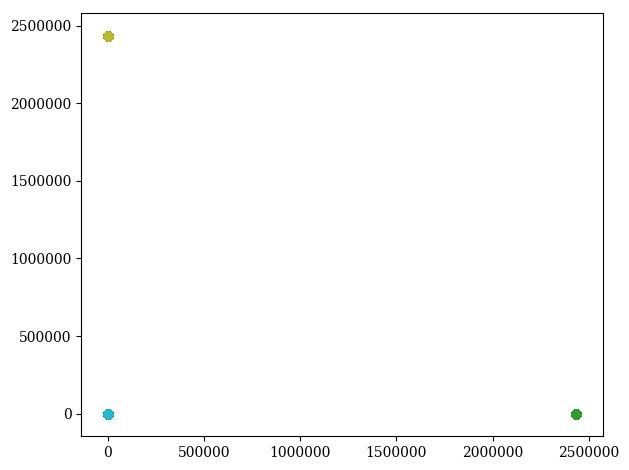

In [8]:
# figsize=(9,5)
figsize=(8,6)
for i=2:5
# subplot(5,1,i)
for j=1:i-1 
#  for i=2:nparam
# #   for j=1:i-1
scatter(vec(par_mcmc[1:nwalkers,iburn:nsteps,i]),vec(par_mcmc[1:nwalkers,iburn:nsteps,j]))
# ylabel(pname[i])
end
end
tight_layout()


## Posterior Distributions

### Plot masses of Venus and Earth in $M_{\oplus}$

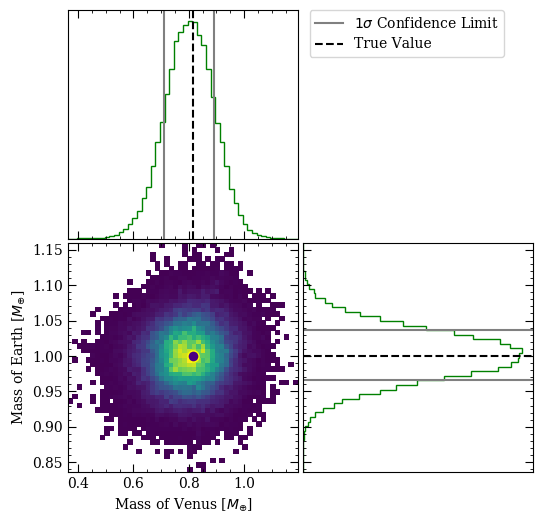

PyObject Text(26.700000000000003, 0.5, 'Mass of Earth [$M_{\\oplus}$]')

In [428]:
nbins = 50
xvalue = vec(par_mcmc[:,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH
yvalue = vec(par_mcmc[:,iburn:nsteps,6]).*CGS.MSUN/CGS.MEARTH
optx = param[1].* CGS.MSUN/CGS.MEARTH
opty = param[6].* CGS.MSUN/CGS.MEARTH
truex = 0.815
truey = 1
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel(L"Mass of Venus [$M_{\oplus}$]")
ylabel(L"Mass of Earth [$M_{\oplus}$]")
# savefig("massposteriors.png")

### Plot TTV of Earth due to Moon $t_{max}$ vs phase change of Moon per Earth year $\Delta \phi$

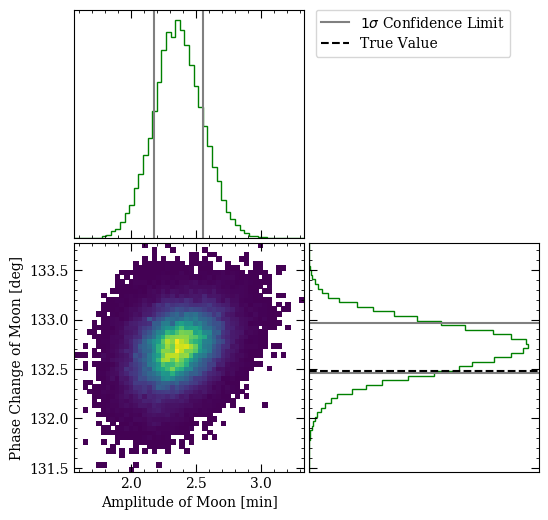

PyObject Text(24.000000000000014, 0.5, 'Phase Change of Moon [deg]')

In [432]:
# function plot_posterior(samples,bins,range)
# tmax = vec(sqrt(par_mcmc[:,iburn:nsteps,16]).^2 + vec(par_mcmc[:,iburn:nsteps,17]).^2)
xvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,16].^2) + vec(par_mcmc[:,iburn:nsteps,17].^2)).* (24 * 60)
yvalue = vec(par_mcmc[:,iburn:nsteps,18]).* 57.2957795 
optx = sqrt(param[16]^2 + param[17]^2).* (24 * 60)
opty = param[18].* 57.2957795 
# truex = 
truey = 2.3122 .* 57.2957795 
meanx=mean(xvalue);sigmax=std(xvalue)
meany=mean(yvalue);sigmay=std(yvalue)
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
xlabel("Amplitude of Moon [min]")
ylabel("Phase Change of Moon [deg]")
# savefig("moonposteriors.png")

### Plot eccentricities of Venus and Earth

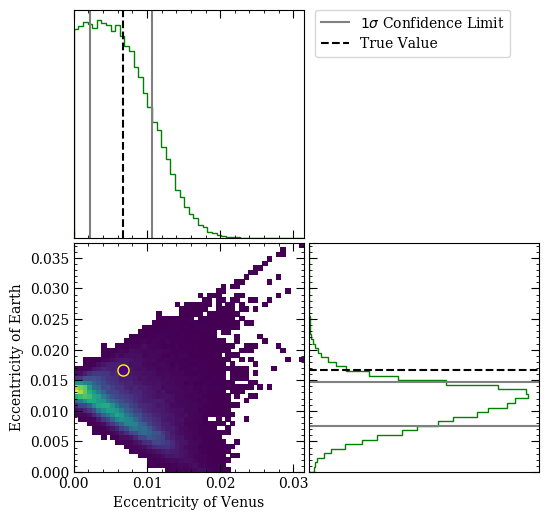

PyObject Text(0.5, 24.0, 'Eccentricity of Venus')

In [433]:
xvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,4]).^2 + vec(par_mcmc[:,iburn:nsteps,5]).^2)
yvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,9]).^2 + vec(par_mcmc[:,iburn:nsteps,10]).^2)
optx = sqrt(param[4]^2 + param[5]^2)
opty = sqrt(param[9]^2 + param[10]^2)
truex = 0.006772
truey = 0.0167086
meanx=mean(xvalue);sigmax=std(xvalue)
meany=mean(yvalue);sigmay=std(yvalue)
nbins=50
corner_plot(xvalue,yvalue,nbins,optx,opty,truex,truey)
ylabel("Eccentricity of Earth")
xlabel("Eccentricity of Venus")
# savefig("eccposteriors.png")

### Plot mass of Jupiter $M_{Jup}$ vs its eccentricity

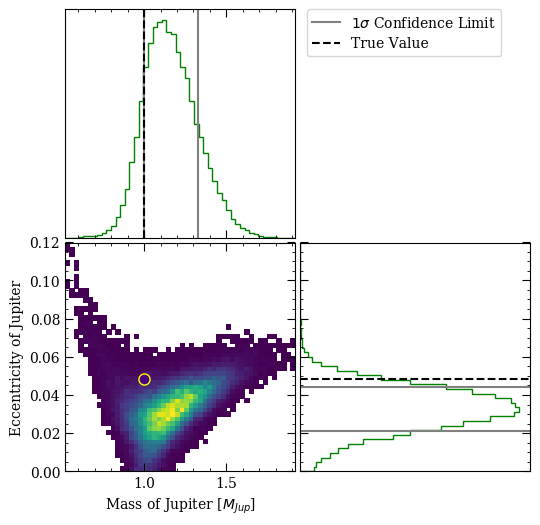

PyObject Text(0.5, 29.299999999999997, 'Mass of Jupiter [$M_{Jup}$]')

In [426]:
xvalue = vec(par_mcmc[:,iburn:nsteps,11]).* CGS.MSUN/CGS.MJUPITER
yvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,14]).^2 + vec(par_mcmc[:,iburn:nsteps,15]).^2)
optx = param[11].* CGS.MSUN/CGS.MJUPITER
opty = sqrt(param[14]^2 + param[15]^2)
truex = 1
truey = 0.04839266
nbins=50
corner_plot(xvalue, yvalue, nbins, optx, opty, truex, truey)
ylabel("Eccentricity of Jupiter")
xlabel(L"Mass of Jupiter [$M_{Jup}$]")
# savefig("jupiterposteriors.png")

### Plot time of inferior conjuction [JD - 24550000] $t_{03}$ vs Jupiter period $P_3$. 

In [ ]:
xvalue = vec(par_mcmc[:,iburn:nsteps,11])
yvalue = sqrt.(vec(par_mcmc[:,iburn:nsteps,14]).^2 + vec(par_mcmc[:,iburn:nsteps,15]).^2)
optx = param[11].* CGS.MSUN/CGS.MJUPITER
opty = sqrt(param[14]^2 + param[15]^2)
truex = 1
truey = 0.04839266
nbins=50
corner_plot(xvalue, yvalue, nbins, optx, opty, truex, truey)
ylabel("Eccentricity of Jupiter")
xlabel(L"Mass of Jupiter [$M_{Jup}$]")